In [46]:
import pip
pip.main(['install','seaborn']);

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
#output_path = 'C:\\Users\\Anna\\Metacity\\Metacity-SynthPop\\output\\'
output_path = "/home/metamat/anicka/Metacity-SynthPop/output/"

## Population Output - MATSim input

In [49]:
df_persons = pd.read_csv(output_path+'df_persons.csv', index_col=[0])
df_persons.set_index("person_id", drop=True, inplace=True)
df_activities = pd.read_csv(output_path+'df_activities.csv', index_col=[0])
df_trips = pd.read_csv(output_path+'df_trips.csv', index_col=[0])

df_activities["o_order"] = df_activities.activity_order.values
df_activities["d_order"] = df_activities.activity_order.values
df_trips["o_order"] = df_trips.trip_order
df_trips["d_order"] = df_trips.trip_order + 1
df_joined_origin = df_activities.merge(df_trips, on=["person_id", "o_order"])
df_joined_dest = df_activities.merge(df_trips, on=["person_id", "d_order"])

df_activities = df_activities.merge(df_persons, on="person_id")
#df_merged = df_persons.merge(df_activities, on="person_id")


traveler_ids = df_activities.person_id.unique()

display(df_persons.head(2))
display(df_activities.head(2))
display(df_trips.head(2))

,trip_today,car_avail,driving_license
person_id,,,
19,True,False,True
260143,True,False,True


,person_id,purpose,start_time,end_time,activity_order,geometry,location_id,o_order,d_order,trip_today,car_avail,driving_license
0,19,home,NaN,27280.0,0,POINT (740734.5446545845 1054142.178270677),175292.0,0,0,True,False,True
1,19,work,27552.0,57475.0,1,POINT (740873.7690999992 1054115.196199998),NaN,1,1,True,False,True


,person_id,traveling_mode,trip_order,o_order,d_order
0,19,pt,0,0,1
1,19,pt,1,1,2


In [50]:
travelers = df_activities.groupby("person_id")

In [51]:
df_count = [[i, df.shape[0]] for i, df in travelers]
df_count = pd.DataFrame(columns=["person_id", "activity_count"], data=df_count)
df_count.set_index("person_id", inplace=True, drop=True)
display(df_count.head(2))

,activity_count
person_id,
1,1
2,3


In [52]:
df_persons["activity_count"] = df_persons.merge(df_count, on="person_id").activity_count.values

In [53]:
display(df_persons.head(2))

,trip_today,car_avail,driving_license,activity_count
person_id,,,,
19,True,False,True,3
260143,True,False,True,3


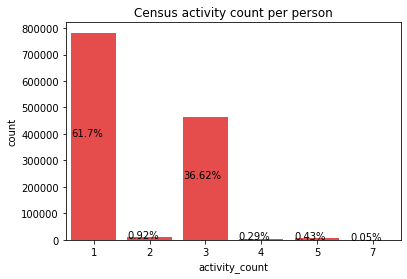

In [54]:
#only one trip
g = sns.countplot(x="activity_count", color="red", alpha=0.8,data=df_persons)
g.set_title("Census activity count per person")
for p in g.patches:
    txt = str((p.get_height()/df_persons.shape[0]*100).round(2)) + '%'
    #txt = str((p.get_height()).round(0)) + '#'
    txt_x = p.get_x()
    txt_y = p.get_height()/2
    g.text(txt_x,txt_y,txt)

plt.savefig(output_path+'census_activity_count_perc.png')

In [55]:
# alespon jedna cesta
print("More than one activity:",df_persons[df_persons.activity_count > 1].shape[0])
print("No travel:",df_persons[df_persons.activity_count <= 1].shape[0])

More than one activity: 485479
No travel: 782026


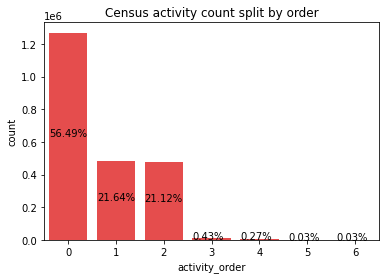

In [56]:
g = sns.countplot(x="activity_order", color="red", alpha=0.8,data=df_activities)
g.set_title("Census activity count split by order")
for p in g.patches:
    txt = str((p.get_height()/df_activities.shape[0]*100).round(2)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()/2
    g.text(txt_x,txt_y,txt)

plt.savefig(output_path+'census_activity_count_order.png')

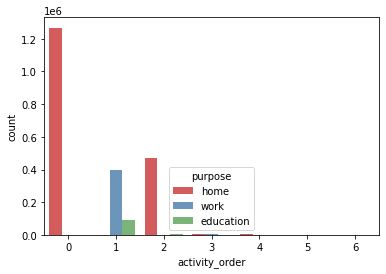

In [57]:
g = sns.countplot(x="activity_order", hue="purpose", palette="Set1", alpha=0.8,data=df_activities)

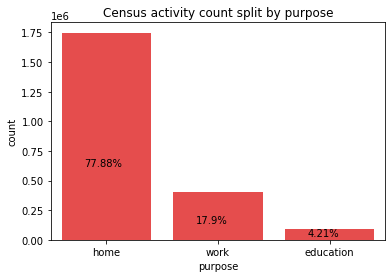

In [58]:
g = sns.countplot(x="purpose", order=['home','work','education'], color="r", alpha=0.8, data=df_activities)
g.set_title("Census activity count split by purpose")
for p in g.patches:
    txt = str((p.get_height()/df_activities.shape[0]*100).round(2)) + '%'
    txt_x = p.get_x() + 0.2
    txt_y = p.get_height()/2.8
    g.text(txt_x,txt_y,txt)

plt.savefig(output_path+'census_activity_count_purpose.png')

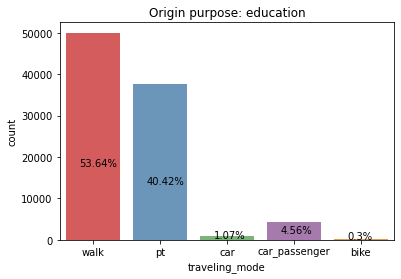

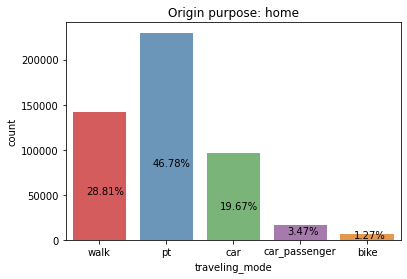

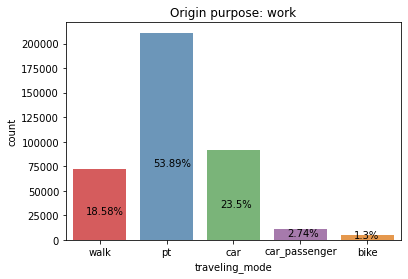

In [59]:
purposes_org = df_joined_origin.groupby("purpose")

for p, df in purposes_org:
    g = sns.countplot(x="traveling_mode",order=['walk','pt','car','car_passenger','bike'], palette="Set1", alpha=0.8, data=df)
    for l in g.patches:
        txt = str((l.get_height()/df.shape[0]*100).round(2)) + '%'
        txt_x = l.get_x() + 0.2
        txt_y = l.get_height()/2.8
        g.text(txt_x,txt_y,txt)
    plt.title("Origin purpose: "+str(p))
    plt.show()

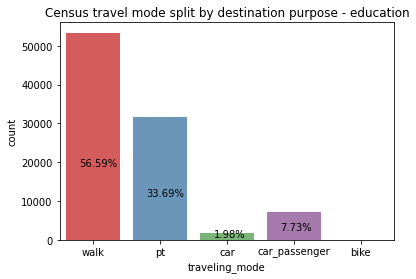

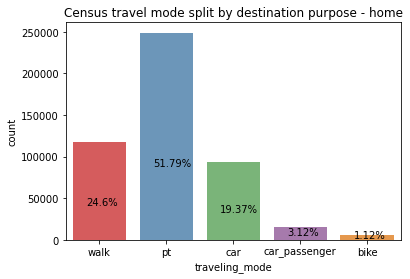

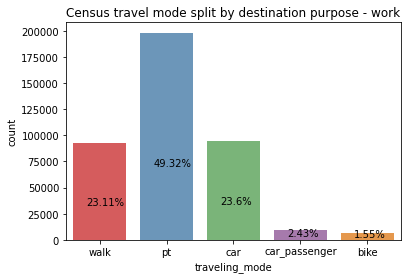

In [60]:
purposes_dest = df_joined_dest.groupby("purpose")

for p, df in purposes_dest:
    g = sns.countplot(x="traveling_mode",order=['walk','pt','car','car_passenger','bike'], palette="Set1", alpha=0.8, data=df)
    for l in g.patches:
        txt = str((l.get_height()/df.shape[0]*100).round(2)) + '%'
        txt_x = l.get_x() + 0.2
        txt_y = l.get_height()/2.8
        g.text(txt_x,txt_y,txt)
    plt.title("Census travel mode split by destination purpose - "+str(p))
    plt.savefig(output_path+'census_'+str(p)+'_dest_tm.png')
    plt.show()